In [142]:
# initialize a random state to be used for all models
rand_state = 30

## use handwritten digits dataset from sklearn

In [143]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np

In [144]:
data = load_digits()

In [145]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [146]:
data.data.shape

(1797, 64)

### data has 1797 rows and 64 columns. or 64 dimensions. one for each pixel in the image

In [147]:
# reshape the data into an 8x8 array
data.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

### visualize data with matplotlib

<Figure size 640x480 with 0 Axes>

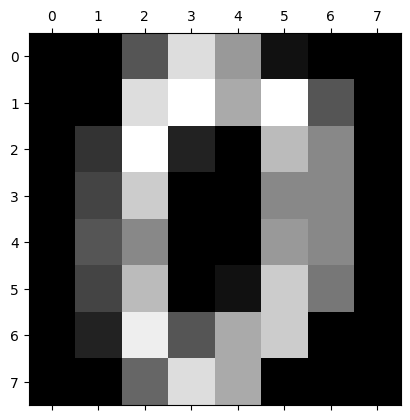

In [148]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.gray()
plt.matshow(data.data[0].reshape(8,8))

In [149]:
# target values
data.target

array([0, 1, 2, ..., 8, 9, 8])

In [150]:
# unique values in target
np.unique(data.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### convert data to a dataframe so it is easier to work with

In [151]:
# use feature_names as the column names. feature names are the pixel positions in the images
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [152]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

- data has no nulls
- each column represents a pixel in the image. for example pixel_0_0 represents the pixel in the first column and first row of the image
- each row in the dataframe represents the pixel values for a single image in the dataset
- the values of each pixel range from 0 to 16 or completely white to completely black

### Split the data

In [154]:
# data
X = df

# labels
y = data.target

### before reducing dimensions, scale the features. This is good practice becuase in other datasets the scale of each feature might not be as uniform as this one

In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### split the data into training and testing sets

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=rand_state)

In [157]:
# train regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

### perform PCA dimensionality reduction on the data

In [158]:
from sklearn.decomposition import PCA

# reduce to the number of dimensions that will contain 95% of the variance of the data
pca = PCA(n_components=0.95)

In [159]:
X_pca = pca.fit_transform(X)

In [160]:
print("Min value = ", X_pca.min())
print("Max value = ", X_pca.max())

Min value =  -31.16990412454435
Max value =  35.4873476732026


- PCA transform has reduced dimensionality to 29 dimensions (columns)
- pca transform does not take the existing data. it calculates new columns. values in X_pca now range between -31.17 and 35.48 instead of 0 and 16

In [161]:
X_pca.shape

(1797, 29)

In [162]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

- percentage of variance in the data that was captured after pca transform
- first column in X_pca contains 14% of the variance, second column is 13% third column is 11% et cetera....
- if the values of the array above are summed, it adds up to 95, which makes sense becuse we passed "0.95" to the n_components argument in the PCA class

In [163]:
pca.explained_variance_ratio_.sum()

0.9547965245651595

### create new train and test splits using PCA transformed data and train the model again

In [164]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=rand_state)

In [165]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)

LogisticRegression(max_iter=1000)

In [166]:
model.score(X_test_pca, y_test)

0.9694444444444444

### Nearly identical accuracy after PCA reduction
- model accuracy without PCA reduction: 0.9722222222222222
- model accuracy with PCA reduction: 0.9694444444444444
- with a more complicated dataset dimensions can effectively be reduced to speed up training time of the model by eliminating some of the dimensions


### Use PCA reduction to reduce down to only five dimensions rather than using 95% of the variance to see how much less accurate it is

In [167]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 5)

In [168]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415])

In [169]:
pca.explained_variance_ratio_.sum()

0.544963526682577

### with five dimensions only 54% of the variance in the data is captured
- train model again with this data

In [170]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=rand_state)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.8555555555555555

- model accuracy when reducing data to only five dimensions: 0.8555555555555555
- dimensionality reduction is a trade off between accuracy and training speed.
- It can make the data much simplier, but it will eventually see significant reduction in accuracy as well.